### *Importing Required Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### *Loading Our Dataset*

In [2]:
data=pd.read_csv("E:\\Data Science\\Project\\Netflix Recommendation System\\Unprocessed Datasets\\movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


*Write Now we have only data till 2016 we will deal with it in upcoming preprocessing file*

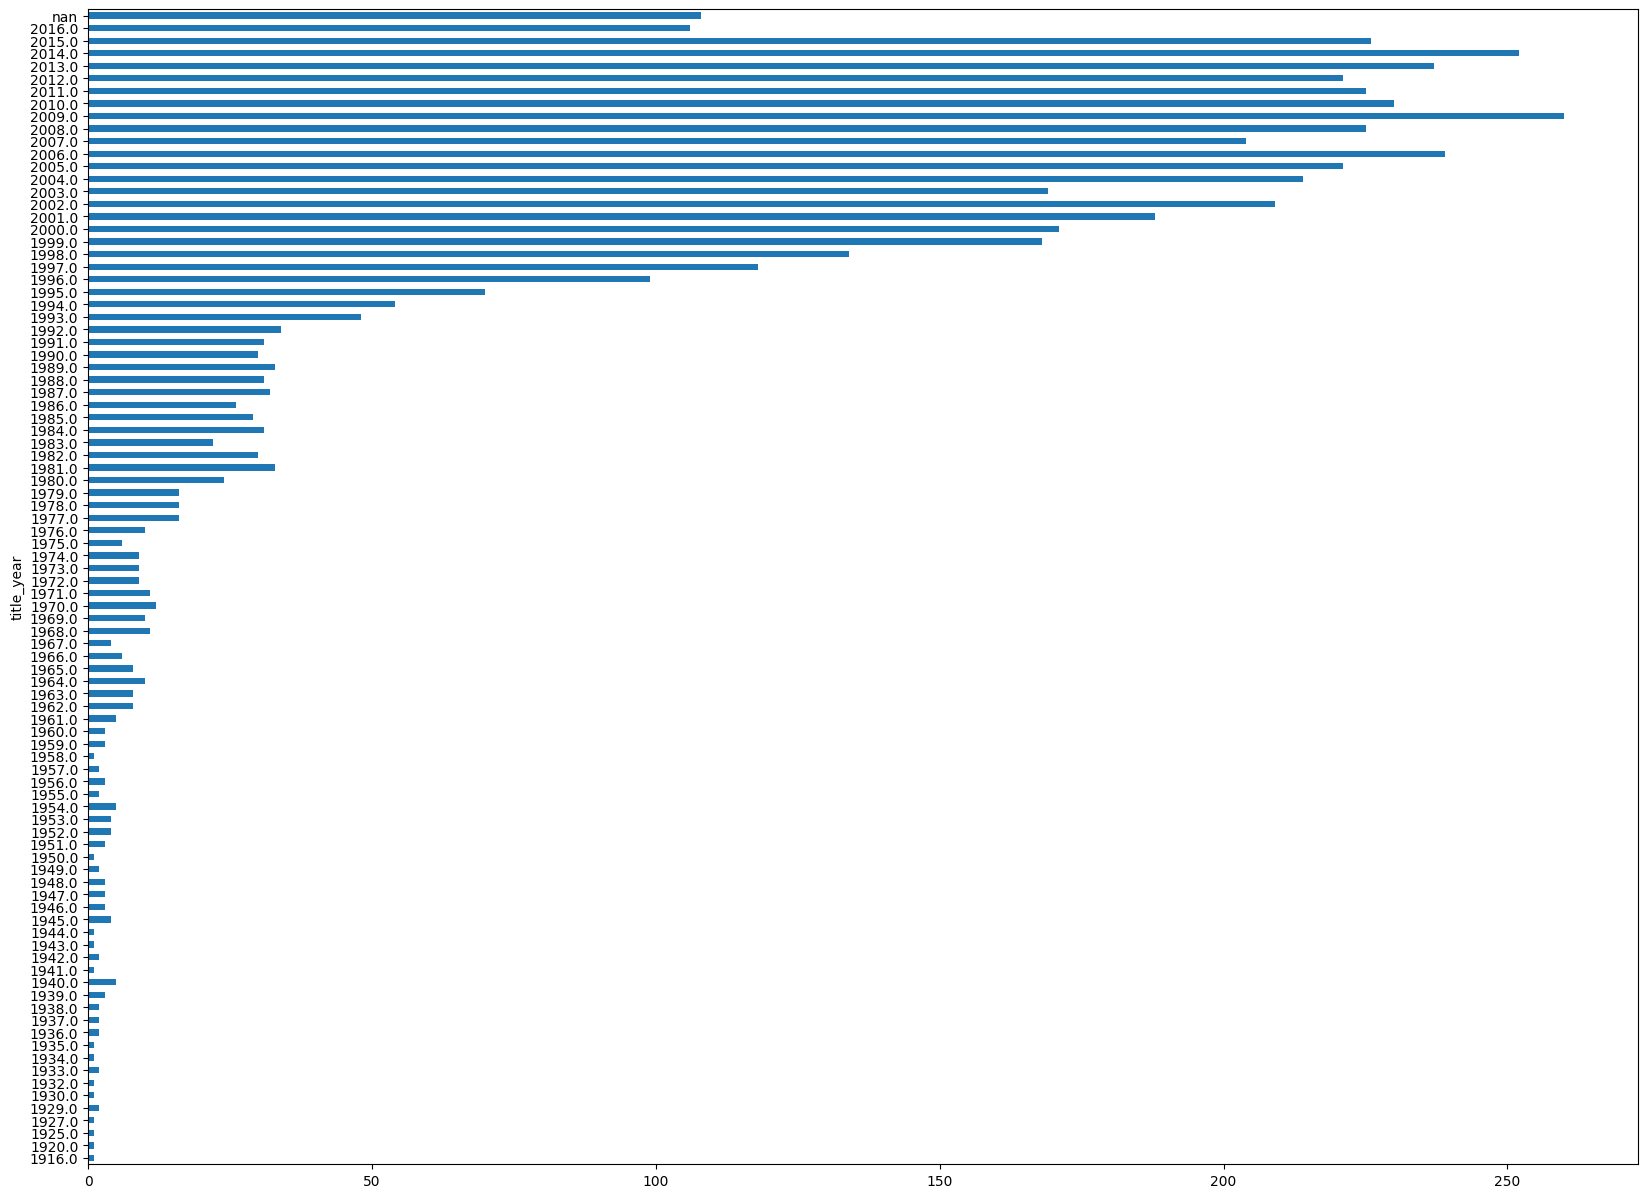

In [3]:
data['title_year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(20,15))
plt.show()

#### *Shape Of Dataset*

In [4]:
data.shape

(5043, 28)

#### *Checking Null Values*

In [5]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### *Replacing The Null Value With A String*

In [6]:
data=data.replace(np.nan,'unknown')

In [7]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,unknown,Doug Walker,unknown,unknown,131.0,unknown,Rob Walker,131.0,unknown,Documentary,...,unknown,unknown,unknown,unknown,unknown,unknown,12.0,7.1,unknown,0


In [8]:
data.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

*'genres', 'plot_keywords' column contain special symbol '|' in their value so it should be replace*

In [9]:
data[['genres','plot_keywords']]

,genres,plot_keywords
0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic
1,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...
2,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist
3,Action|Thriller,deception|imprisonment|lawlessness|police offi...
4,Documentary,unknown
...,...,...
5038,Comedy|Drama,fraud|postal worker|prison|theft|trial
5039,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer
5040,Drama|Horror|Thriller,unknown
5041,Comedy|Drama|Romance,unknown


In [10]:
data['genres']=data['genres'].str.replace('|',' ')
data['plot_keywords']=data['plot_keywords'].str.replace('|',' ')

In [11]:
data[['genres','plot_keywords']]

,genres,plot_keywords
0,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic
1,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...
2,Action Adventure Thriller,bomb espionage sequel spy terrorist
3,Action Thriller,deception imprisonment lawlessness police offi...
4,Documentary,unknown
...,...,...
5038,Comedy Drama,fraud postal worker prison theft trial
5039,Crime Drama Mystery Thriller,cult fbi hideout prison escape serial killer
5040,Drama Horror Thriller,unknown
5041,Comedy Drama Romance,unknown


*If we are working with data,then our data should be in lower case*

In [12]:
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,color,james cameron,723.0,178.0,0.0,855.0,joel david moore,1000.0,760505847.0,action adventure fantasy sci-fi,...,3054.0,english,usa,pg-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,color,gore verbinski,302.0,169.0,563.0,1000.0,orlando bloom,40000.0,309404152.0,action adventure fantasy,...,1238.0,english,usa,pg-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,color,sam mendes,602.0,148.0,0.0,161.0,rory kinnear,11000.0,200074175.0,action adventure thriller,...,994.0,english,uk,pg-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,color,christopher nolan,813.0,164.0,22000.0,23000.0,christian bale,27000.0,448130642.0,action thriller,...,2701.0,english,usa,pg-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,unknown,doug walker,unknown,unknown,131.0,unknown,rob walker,131.0,unknown,documentary,...,unknown,unknown,unknown,unknown,unknown,unknown,12.0,7.1,unknown,0


*Saving Our Processed Data*

In [13]:
data.to_csv('data_1.csv',index=False)